In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
from test import *
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier, LogisticRegression
from collections import Counter
import seaborn as sns
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import euclidean_distances
import sklearn.manifold as sklman

In [33]:
# with open('bio_feb.pkl', 'r') as f:
#     bio_feb = pickle.load(f)
    
# with open('bio_jan.pkl', 'r') as f:
#     bio_jan = pickle.load(f)

with open('bio_march.pkl', 'r') as f:
    bio_march = pickle.load(f)
    
with open('bio_april.pkl', 'r') as f:
    bio_april = pickle.load(f)

with open('bio_may.pkl', 'r') as f:
    bio_may = pickle.load(f)
    
with open('bio_june.pkl', 'r') as f:
    bio_june = pickle.load(f)
    
with open('bio_july.pkl', 'r') as f:
    bio_july = pickle.load(f)
    
with open('bio_august.pkl', 'r') as f:
    bio_august = pickle.load(f)
    
with open ('bio_1201.pkl', 'r') as f:
    bio_1201 = pickle.load(f)
    
with open ('bio_1202.pkl', 'r') as f:
    bio_1202 = pickle.load(f)
    
with open ('bio_1203.pkl', 'r') as f:
    bio_1203 = pickle.load(f)
    
with open ('bio_1204.pkl', 'r') as f:
    bio_1204 = pickle.load(f)
    
with open ('bio_1205.pkl', 'r') as f:
    bio_1205 = pickle.load(f)
    
with open ('bio_1206.pkl', 'r') as f:
    bio_1206 = pickle.load(f)
    
with open ('bio_1207.pkl', 'r') as f:
    bio_1207 = pickle.load(f)
    
with open ('bio_1208.pkl', 'r') as f:
    bio_1208 = pickle.load(f)
    
with open ('bio_1209.pkl', 'r') as f:
    bio_1209 = pickle.load(f)
    
with open ('bio_1210.pkl', 'r') as f:
    bio_1210 = pickle.load(f)
    
with open ('bio_1211.pkl', 'r') as f:
    bio_1211 = pickle.load(f)
    
with open ('bio_1212.pkl', 'r') as f:
    bio_1212 = pickle.load(f)
    
with open ('bio_1301.pkl', 'r') as f:
    bio_1301 = pickle.load(f)
    
with open ('bio_1302.pkl', 'r') as f:
    bio_1302 = pickle.load(f)
    
with open ('bio_1303.pkl', 'r') as f:
    bio_1303 = pickle.load(f)
    
with open ('bio_1304.pkl', 'r') as f:
    bio_1304 = pickle.load(f)
    
with open ('bio_1305.pkl', 'r') as f:
    bio_1305 = pickle.load(f)
    
with open ('bio_1306.pkl', 'r') as f:
    bio_1306 = pickle.load(f)
    
with open ('bio_1307.pkl', 'r') as f:
    bio_1307 = pickle.load(f)
    
# with open ('bio_1308.pkl', 'r') as f:
#     bio_1308 = pickle.load(f)
    
# with open ('bio_1309.pkl', 'r') as f:
#     bio_1309 = pickle.load(f)
    
# with open ('bio_1310.pkl', 'r') as f:
#     bio_1310 = pickle.load(f)
    
# with open ('bio_1311.pkl', 'r') as f:
#     bio_1311 = pickle.load(f)
    
# with open ('bio_1312.pkl', 'r') as f:
#     bio_1312 = pickle.load(f)
    
# with open ('bio_1401.pkl', 'r') as f:
#     bio_1401 = pickle.load(f)
    
# with open ('bio_1402.pkl', 'r') as f:
#     bio_1402 = pickle.load(f)
    
# with open ('bio_1403.pkl', 'r') as f:
#     bio_1403 = pickle.load(f)
    
# with open ('bio_1404.pkl', 'r') as f:
#     bio_1404 = pickle.load(f)
    
# with open ('bio_1405.pkl', 'r') as f:
#     bio_1405 = pickle.load(f)
    
# with open ('bio_1406.pkl', 'r') as f:
#     bio_1406 = pickle.load(f)
    
# with open ('bio_1407.pkl', 'r') as f:
#     bio_1407 = pickle.load(f)
    
# with open ('bio_1408.pkl', 'r') as f:
#     bio_1408 = pickle.load(f)
    
# with open ('bio_1409.pkl', 'r') as f:
#     bio_1409 = pickle.load(f)
    
# with open ('bio_1410.pkl', 'r') as f:
#     bio_1410 = pickle.load(f)
    
# with open ('bio_1411.pkl', 'r') as f:
#     bio_1411 = pickle.load(f)
    
# with open ('bio_1412.pkl', 'r') as f:
#     bio_1412 = pickle.load(f)

In [35]:
%%time
Topics = [bio_march, bio_april, bio_may, bio_june, bio_july, bio_august,
          bio_1201, bio_1202, bio_1202, bio_1204, bio_1205, bio_1206, bio_1207, bio_1208,
          bio_1209, bio_1210, bio_1211, bio_1212, bio_1301, bio_1302, bio_1303, bio_1304,
          bio_1305, bio_1306, bio_1307]


# bio_1308, bio_1309, bio_1310, bio_1311, bio_1312,
#           bio_1401, bio_1402, bio_1403, bio_1404, bio_1405, bio_1406, bio_1407, bio_1408,
#           bio_1409, bio_1410, bio_1411, bio_1412]


text = []
title_list = []
urls = []
labels = []
for topic in Topics:
    for triple in topic:
        text.append(triple[0])
        urls.append(triple[1])
        title_list.append(triple[2])
        labels.append(triple[3])
print len(text)

390
CPU times: user 665 µs, sys: 458 µs, total: 1.12 ms
Wall time: 770 µs


In [36]:
bio_data = {'text': text, 'url': urls, 'title': title_list, 'label': labels}
bio_df = pd.DataFrame(bio_data)
print len(bio_df)

390


In [5]:
bio_df.to_pickle('bio_df.pkl')

In [37]:
math_df = pd.read_pickle('general_math_text_titles_urls_label_df.pkl')

In [38]:
math_and_bio = pd.concat([math_df, bio_df], axis=0)
len(math_and_bio)

9792

In [10]:
math_and_bio.to_pickle('math_and_bio.pkl')

In [39]:
math_and_bio.tail()

,label,text,title,url
385,BIO,3\n1\n0\n2\n\n \nl\nu\nJ\n \n\n0\n3\n\n \n \n]...,\nTitle: Cerulean: A hybrid assembly using hig...,http://lanl.arxiv.org/pdf/1307.7933
386,BIO,3\n1\n0\n2\n\n \nl\nu\nJ\n \n\n0\n3\n\n \n \n]...,\nTitle: Sibelia: A scalable and comprehensive...,http://lanl.arxiv.org/pdf/1307.7941
387,BIO,1\n\n2\n\n3\n\n4\n\n5\n\n6\n\n7\n\n8\n\n9\n\n1...,\nTitle: Revealing the missing heritability vi...,http://lanl.arxiv.org/pdf/1307.7950
388,BIO,1MaximumlikelihoodevidenceforNeandertaladmixtu...,\nTitle: Maximum likelihood evidence for Neand...,http://lanl.arxiv.org/pdf/1307.8263
389,BIO,3\n1\n0\n2\n\n \nl\nu\nJ\n \n\n7\n2\n\n \n \n]...,\nTitle: Wavelet-based genetic association ana...,http://lanl.arxiv.org/pdf/1307.7203


In [40]:
%%time
text_data = math_and_bio['text'].values
targets = math_and_bio['label'].values
print type(text_data)
text_data = list(text_data)
text_data = clean_pdf_text(text_data)
text_data = np.array(text_data)
print type(text_data)


<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
CPU times: user 33.2 s, sys: 6.83 s, total: 40.1 s
Wall time: 41.7 s


In [41]:
%%time

tfidf_bio = TfidfVectorizer(max_features=10000, stop_words=math_stop(), \
                    ngram_range=(1, 2), decode_error='ignore')

M_bio = tfidf_bio.fit_transform(text_data)


NameError: name 'M' is not defined

In [ ]:
with open('bio_model_and_matrix', 'w') as f:
    pickle.dump((tfidf_bio, M_bio), f)

In [43]:
N_bio = M_bio.todense()

In [44]:
N_bio.shape

(9792, 10000)

In [45]:

df = pd.DataFrame(data=N_bio)
print "Data: ", df.shape
Tar = pd.DataFrame(data=targets, columns=['label'])
print "Targets: ", Tar.shape
result = pd.concat([df, Tar], axis=1)
print "Result: ", result.shape
class_labels = math_and_bio['label'].unique()

Data:  (9792, 10000)
Targets:  (9792, 1)
Result:  (9792, 10001)


In [47]:
# %%time
# Dist_between_cats = np.zeros(33 * 33).reshape(33,33)

# bio_max_cat_dists = pd.DataFrame(Dist_between_cats, index=class_labels, columns=class_labels)
# bio_min_cat_dists = pd.DataFrame(Dist_between_cats, index=class_labels, columns=class_labels)
# bio_avg_cat_dists = pd.DataFrame(Dist_between_cats, index=class_labels, columns=class_labels)
# for label in class_labels:
#     temp_df_one = result[result['label']==label].drop('label', axis=1)
#     print label
#     for other_label in class_labels:
#         print "---{0}".format(other_label)
#         temp_df_two = result[result['label']==other_label].drop('label', axis=1)
#         bio_max_cat_dists[label][other_label] = np.min(euclidean_distances(temp_df_one, temp_df_two))
#         bio_avg_cat_dists[label][other_label] = np.mean(euclidean_distances(temp_df_one, temp_df_two))
#         bio_min_cat_dists[label][other_label] = np.max(euclidean_distances(temp_df_one, temp_df_two))

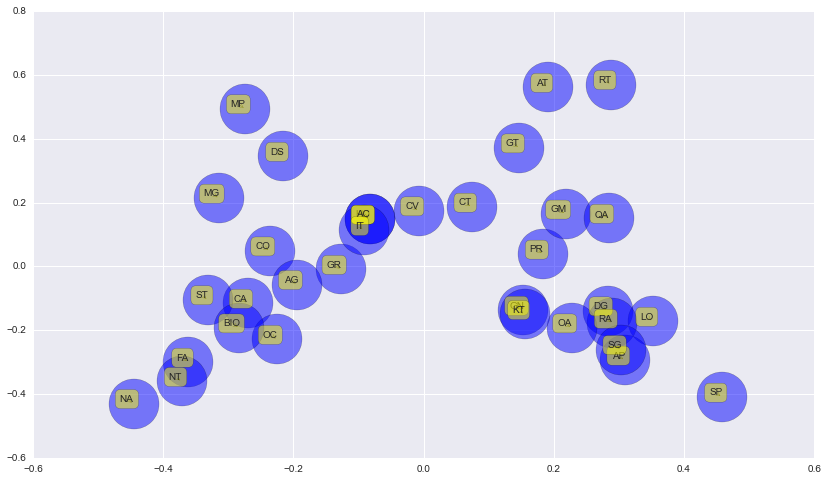

In [48]:
spec = sklman.SpectralEmbedding()
coords_spec = spec.fit_transform(bio_min_cat_dists)# %%time
# Dist_between_cats = np.zeros(33 * 33).reshape(33,33)

# bio_max_cat_dists = pd.DataFrame(Dist_between_cats, index=class_labels, columns=class_labels)
# bio_min_cat_dists = pd.DataFrame(Dist_between_cats, index=class_labels, columns=class_labels)
# bio_avg_cat_dists = pd.DataFrame(Dist_between_cats, index=class_labels, columns=class_labels)
# for label in class_labels:
#     temp_df_one = result[result['label']==label].drop('label', axis=1)
#     print label
#     for other_label in class_labels:
#         print "---{0}".format(other_label)
#         temp_df_two = result[result['label']==other_label].drop('label', axis=1)
#         bio_max_cat_dists[label][other_label] = np.min(euclidean_distances(temp_df_one, temp_df_two))
#         bio_avg_cat_dists[label][other_label] = np.mean(euclidean_distances(temp_df_one, temp_df_two))
#         bio_min_cat_dists[label][other_label] = np.max(euclidean_distances(temp_df_one, temp_df_two))
plt.figure(figsize=(14,8))
plt.scatter(coords_spec[:,0], coords_spec[:,1], alpha=0.5, s=2500, cmap='winter')
for label, x, y in zip(class_labels, coords_spec[:, 0], coords_spec[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [49]:
len(labels)

390

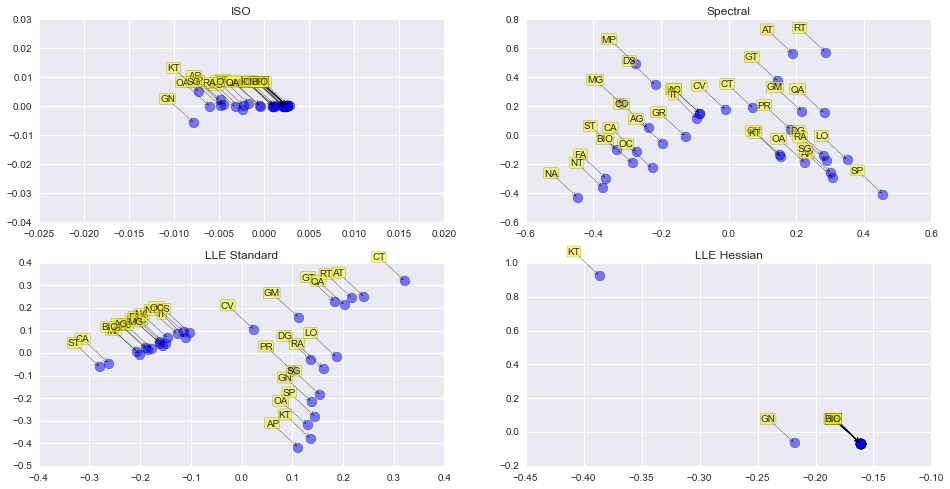

In [50]:
spec = sklman.SpectralEmbedding()
coords_spec = spec.fit_transform(bio_avg_cat_dists)

lle = sklman.LocallyLinearEmbedding(method='standard', n_neighbors=6)
coords_lle = lle.fit_transform(bio_avg_cat_dists)

iso = sklman.Isomap(n_components=2)
coords_iso = iso.fit_transform(bio_avg_cat_dists)

lle2 = sklman.LocallyLinearEmbedding(method='hessian', n_neighbors=6)
coords_lle2 = lle2.fit_transform(bio_avg_cat_dists)


f, axarr = plt.subplots(2, 2,figsize=(16,8))

axarr[0,0].scatter(coords_iso[:,0], coords_iso[:,1], alpha=0.5, s=100, cmap='winter')
for label, x, y in zip(class_labels, coords_iso[:, 0], coords_iso[:, 1]):
    axarr[0,0].annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.1', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
axarr[0,0].set_title("ISO")
    
axarr[1,0].scatter(coords_lle[:,0], coords_lle[:,1], alpha=0.5, s=100, cmap='winter')
for label, x, y in zip(class_labels, coords_lle[:, 0], coords_lle[:, 1]):
    axarr[1,0].annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.1', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
axarr[1,0].set_title("LLE Standard")

axarr[0,1].scatter(coords_spec[:,0], coords_spec[:,1], alpha=0.5, s=100, cmap='winter')
for label, x, y in zip(class_labels, coords_spec[:, 0], coords_spec[:, 1]):
    axarr[0,1].annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.1', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
axarr[0,1].set_title("Spectral")
    
    
axarr[1,1].scatter(coords_lle2[:,0], coords_lle2[:,1], alpha=0.5, s=100, cmap='winter')
for label, x, y in zip(class_labels, coords_lle2[:, 0], coords_lle2[:, 1]):
    axarr[1,1].annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.1', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
axarr[1,1].set_title("LLE Hessian")
    
plt.show()

In [66]:
%%time
text_data = math_and_bio['text'].values
targets = math_and_bio['label'].values
print type(text_data)
text_data = list(text_data)
text_data = clean_pdf_text(text_data)
text_data = np.array(text_data)
print type(text_data)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
CPU times: user 35.3 s, sys: 6 s, total: 41.3 s
Wall time: 42.2 s


In [68]:
len(targets)

9495

In [70]:
%%time

tfidf_bio = TfidfVectorizer(max_features=10000, stop_words=math_stop(), \
                    ngram_range=(1, 2), decode_error='ignore')

M = tfidf_bio.fit_transform(text_data)
N = M.todense()

CPU times: user 19min 32s, sys: 17.7 s, total: 19min 49s
Wall time: 19min 57s


In [78]:
with open('math_and_bio_model_and_matrix.pkl', 'w') as f:
    pickle.dump((tfidf_bio, M),f)

Open up math and bio

In [13]:
with open('math_and_bio_model_and_matrix.pkl', 'r') as f:
    tfidf_bio, M_bio = pickle.load(f)
N_bio = M_bio.todense()

In [17]:
targets = math_and_bio['label'].values
df = pd.DataFrame(data=N_bio)
print "Data: ", df.shape
Tar = pd.DataFrame(data=targets, columns=['label'])
print "Targets: ", Tar.shape
result = pd.concat([df, Tar], axis=1)
print "Result: ", result.shape
class_labels = math_and_bio['label'].unique()
print len(class_labels)

Data:  (9495, 10000)
Targets:  (9495, 1)
Result:  (9495, 10001)
33


In [19]:
# %%time
# Dist_between_cats = np.zeros(33 * 33).reshape(33,33)

# bio_max_cat_dists = pd.DataFrame(Dist_between_cats, index=class_labels, columns=class_labels)
# bio_min_cat_dists = pd.DataFrame(Dist_between_cats, index=class_labels, columns=class_labels)
# bio_avg_cat_dists = pd.DataFrame(Dist_between_cats, index=class_labels, columns=class_labels)
# for label in class_labels:
#     temp_df_one = result[result['label']==label].drop('label', axis=1)
#     print label
#     for other_label in class_labels:
#         print "---{0}".format(other_label)
#         temp_df_two = result[result['label']==other_label].drop('label', axis=1)
#         bio_max_cat_dists[label][other_label] = np.min(euclidean_distances(temp_df_one, temp_df_two))
#         bio_avg_cat_dists[label][other_label] = np.mean(euclidean_distances(temp_df_one, temp_df_two))
#         bio_min_cat_dists[label][other_label] = np.max(euclidean_distances(temp_df_one, temp_df_two))

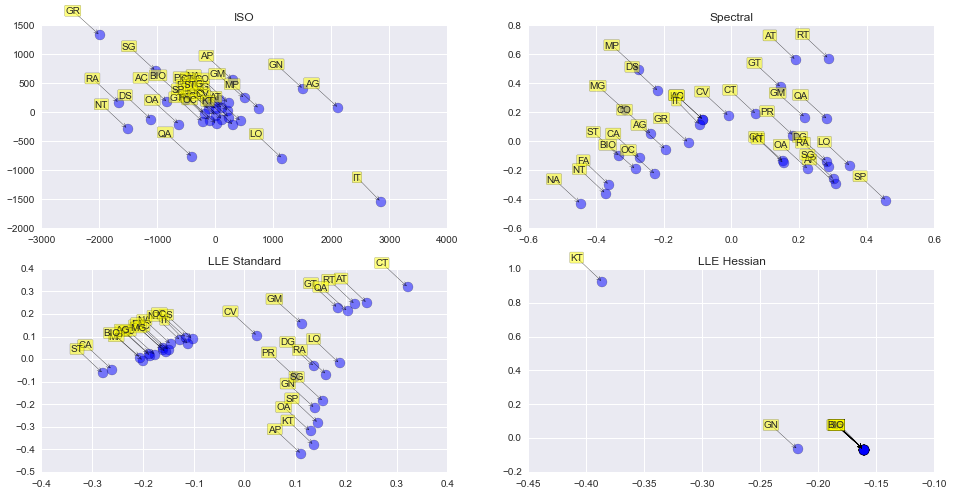

In [51]:
spec = sklman.SpectralEmbedding()
coords_spec = spec.fit_transform(bio_avg_cat_dists)

lle = sklman.LocallyLinearEmbedding(method='standard', n_neighbors=6)
coords_lle = lle.fit_transform(bio_avg_cat_dists)

iso = sklman.Isomap(n_components=2)
coords_iso = iso.fit_transform(bio_avg_cat_dists)

lle2 = sklman.LocallyLinearEmbedding(method='hessian', n_neighbors=6)
coords_lle2 = lle2.fit_transform(bio_avg_cat_dists)

tsne = sklman.TSNE(metric='precomputed')
coords_tsne = tsne.fit_transform(bio_avg_cat_dists)

f, axarr = plt.subplots(2, 2,figsize=(16,8))

axarr[0,0].scatter(coords_tsne[:,0], coords_tsne[:,1], alpha=0.5, s=100, cmap='winter')
for label, x, y in zip(class_labels, coords_tsne[:, 0], coords_tsne[:, 1]):
    axarr[0,0].annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.1', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
axarr[0,0].set_title("ISO")
    
axarr[1,0].scatter(coords_lle[:,0], coords_lle[:,1], alpha=0.5, s=100, cmap='winter')
for label, x, y in zip(class_labels, coords_lle[:, 0], coords_lle[:, 1]):
    axarr[1,0].annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.1', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
axarr[1,0].set_title("LLE Standard")

axarr[0,1].scatter(coords_spec[:,0], coords_spec[:,1], alpha=0.5, s=100, cmap='winter')
for label, x, y in zip(class_labels, coords_spec[:, 0], coords_spec[:, 1]):
    axarr[0,1].annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.1', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
axarr[0,1].set_title("Spectral")
    
    
axarr[1,1].scatter(coords_lle2[:,0], coords_lle2[:,1], alpha=0.5, s=100, cmap='winter')
for label, x, y in zip(class_labels, coords_lle2[:, 0], coords_lle2[:, 1]):
    axarr[1,1].annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.1', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
axarr[1,1].set_title("LLE Hessian")
    
plt.show()